In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 1: Data Preprocessing**

In [2]:
 # Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Handle missing values
df = df.dropna()

In [4]:
# Convert categorical variables to numerical values
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Convert target variable
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding for categorical variables

# **Step 2: Data Splitting**

In [5]:
# Scale/normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Step 3: Model Training and Evaluation**

In [6]:
# Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
# Predict with Decision Tree
y_pred_dt = dt_model.predict(X_test)

In [8]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Predict with Random Forest
y_pred_rf = rf_model.predict(X_test)

In [10]:
# Evaluate both models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"--- {model_name} Metrics ---")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")
    return accuracy, precision, recall, f1

In [11]:
evaluate_model(y_test, y_pred_dt, "Decision Tree")

--- Decision Tree Metrics ---
Accuracy: 0.77
Precision: 0.58
Recall: 0.48
F1 Score: 0.53



(0.7714691270404542,
 0.5825242718446602,
 0.48257372654155495,
 0.5278592375366569)

In [12]:
evaluate_model(y_test, y_pred_rf, "Random Forest")

--- Random Forest Metrics ---
Accuracy: 0.80
Precision: 0.70
Recall: 0.45
F1 Score: 0.55



(0.8034066713981547,
 0.6983471074380165,
 0.45308310991957107,
 0.5495934959349593)

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [14]:
# Assuming 'rf_model' is the trained Random Forest model and 'X_train' contains feature columns
# Extract feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

In [15]:
# Sort the importances
sorted_importances = feature_importances.sort_values(ascending=False)

<ipython-input-16-122a8d0c6632>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances[:10], y=sorted_importances.index[:10], palette="Blues_r")


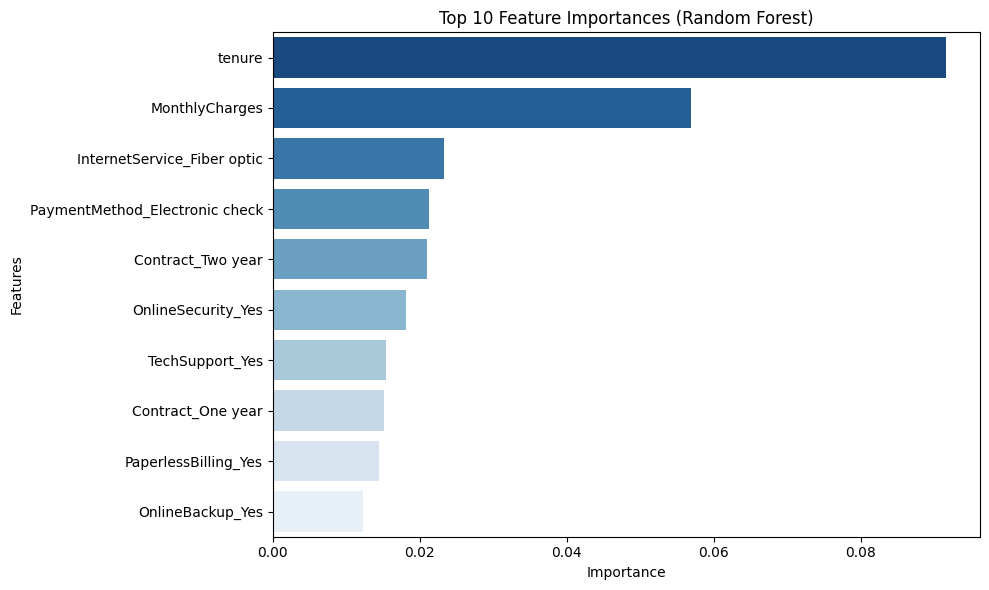

In [16]:
# Plot the feature importances (top 10 for clarity)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances[:10], y=sorted_importances.index[:10], palette="Blues_r")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()